# Breaking a CAPTCHA system

Ref: https://medium.com/@ageitgey/how-to-break-a-captcha-system-in-15-minutes-with-machine-learning-dbebb035a710

In [57]:
%%javascript
IPython.notebook.clear_all_output();

<IPython.core.display.Javascript object>

In [165]:
!pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [166]:
!jupyter nbconvert --to html assignment2_skhan6.ipynb

[NbConvertApp] Converting notebook assignment2_skhan6.ipynb to html
[NbConvertApp] Writing 753022 bytes to assignment2_skhan6.html


Install some packages below (if not installed already):

In [58]:
import numpy as np 
import pandas
import os
import os.path
import glob
import imutils
import cv2


In [59]:
!pip install opencv-python
!pip install imutils
!pip install -q pydot
#!conda install pydot -y
#!pip install graphviz !apt-get
#!conda install graphviz -y

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
#!brew install graphviz # only for mac, for other OS, please search the relevant command to install
#!brew install wget # only for mac; Linux should work fine, Windows has no wget

In [61]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In this exercise you will break `Really Simple CAPTCHA` plugin of WordPress: https://wordpress.org/plugins/really-simple-captcha/

Try a demo here: https://contactform7.com/captcha/

The plugin generates 4-letter CAPTCHAs using a random mix of four different fonts. Letters are from 'ABCDEFGHJKLMNPQRSTUVWXYZ23456789' and "O", "I" and "1" are not used to avoid user confusion. That leaves us with a total of 32 possible letters and numbers that we need to recognize.

Since we have the source code to the WordPress plug-in, we can modify it to save out CAPTCHA images along with the expected answer for each image. We generated 9955 images under folder `generated_captcha_images`. Run the following code to show 10 images to take a look.

In [62]:
CAPTCHA_IMAGE_FOLDER = "generated_captcha_images"

In [63]:
!unzip "generated_captcha_images.zip"

Archive:  generated_captcha_images.zip
replace __MACOSX/._generated_captcha_images? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace generated_captcha_images/32Q4.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Step 1: Extract single letters from CAPTCHA images

### Run the following code to show 10 images to take a look.

In [64]:
import os.path
import glob # glob.glob returns the list of files with their full path, and it supports wildcards

from IPython.display import Image

captcha_image_files = glob.glob(os.path.join(CAPTCHA_IMAGE_FOLDER, "*"))

for (i, captcha_image_file) in enumerate(captcha_image_files):
    if i==10: break
    print(captcha_image_file)
    display(Image(filename=captcha_image_file))

generated_captcha_images/3CE3.png


generated_captcha_images/Q7KY.png


generated_captcha_images/9842.png


generated_captcha_images/G5P5.png


generated_captcha_images/36SY.png


generated_captcha_images/BD35.png


generated_captcha_images/5Q3W.png


generated_captcha_images/384N.png


generated_captcha_images/UR88.png


generated_captcha_images/Y26R.png


### Now we illustrate how to process an image `generated_captcha_images/222X.png`

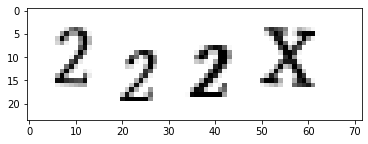

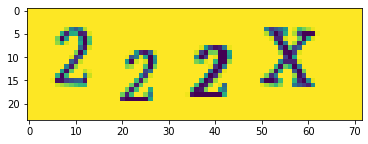

In [65]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
from matplotlib import pyplot as plt
import cv2 # OpenCV, a popular framework for computer vision and image processing

captcha_image_file = 'generated_captcha_images/222X.png' # normal
# captcha_image_file = 'generated_captcha_images/2W4M.png' # try this: 3 objects, 2 letters are merged
# captcha_image_file = 'generated_captcha_images/3PH3.png' # try this: 5 objects detected
# captcha_image_file = 'generated_captcha_images/JYU4.png' # try this: 6 objects detected

captcha_correct_text = os.path.splitext(captcha_image_file)[0]

# Load the image and convert it to grayscale
image = cv2.imread(captcha_image_file)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Show the image with matplotlib
plt.imshow(image)
plt.show()

plt.imshow(gray)
plt.show()

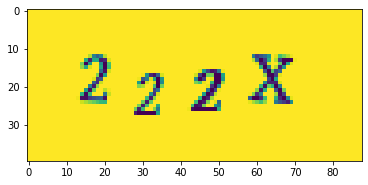

In [66]:
# Add some extra padding around the image
gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

plt.imshow(gray)
plt.show()

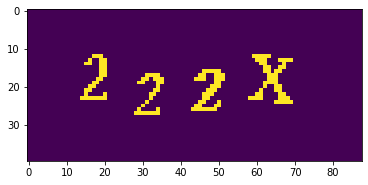

In [67]:
# threshold the image (convert it to pure black and white)
# we use Otsu’s binarization
# check: https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

plt.imshow(thresh)
plt.show()

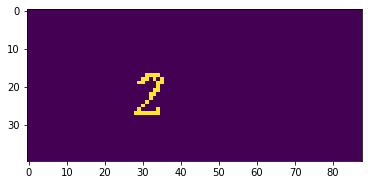

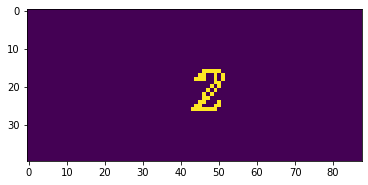

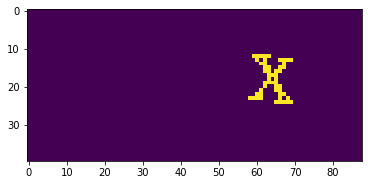

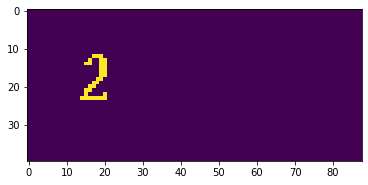

In [68]:
import numpy as np

# find the contours (continuous blobs of pixels) the image
# check:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html#contours-getting-started
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
# !!! if the cell reports error, replace [0] above with [1]

zero_img = np.zeros_like(thresh)

for i in range(len(contours)):
    temp = cv2.drawContours(zero_img.copy(), contours, i, (255,0,0), 1)
    plt.imshow(temp)
    plt.show()

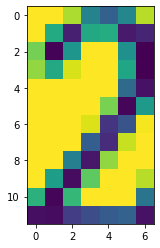

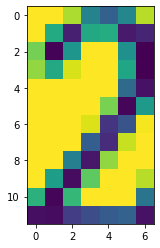

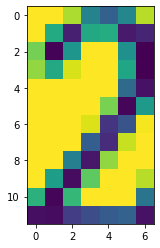

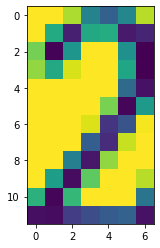

In [69]:
for i in contours:
    # Get the rectangle that contains the contour
    (x, y, w, h) = cv2.boundingRect(contour)
    letter_image = gray[y:y+h, x:x+w]
    plt.imshow(letter_image)
    plt.show()

### Putting things together: get letters from images

Using what we have learnt above, write your code to save get the letters of all images. The letter-images are stored as 32 folders under folder `extracted_letter_images`.

For example, `extracted_letter_images/A` is a folder that saves all images of letter `A`. After you complete, each letter-folder should contain over 1000 letter-images.

Hint: (1) consider how to name different files in a letter-folder differently? (2) ingore those images with number of contours other than 4.

In [161]:
import os

LETTER_IMAGES_FOLDER = "extracted_letter_images" # the output for training
SKIPPED_FOLDER = "skipped_images" # those images are skipped
counts = {} # counts['A'] = number of 'A'-images, so that next 'A'-image can be named as counts['A'] + 1

# loop over the image paths
for (i, captcha_image_file) in enumerate(captcha_image_files):
    print("[INFO] processing image {}/{}".format(i + 1, len(captcha_image_files)))

    #############################################################################
    # TODO: your code here ...                                                  #
    #############################################################################
    
    file_name = os.path.basename(captcha_image_file)
    captcha_text = os.path.splitext(file_name)[0]

    image = cv2.imread(captcha_image_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)
    
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    contours = contours[1] if imutils.is_cv3() else contours[0]    
    letter_padding = []

    for i in contours:        
        (x, y, width, height) = cv2.boundingRect(i)
        if 1.25 < width / height:            
            Width_Half = int(width / 2)
            letter_padding.append((x, y, Width_Half, height))
            letter_padding.append((x + Width_Half, y, Width_Half, height))
        else:            
            letter_padding.append((x, y, width, height))

    if len(letter_padding) != 4:
        continue
   
    letter_padding = sorted(letter_padding, key=lambda x: x[0])
   
    for letter_bounding_box, lettertext in zip(letter_padding, captcha_text):       
        x, y, width, height = letter_bounding_box
        letter_image = gray[y - 2:y + height + 2, x - 2:x + width + 2]
        save_path = os.path.join(LETTER_IMAGES_FOLDER, lettertext)
        if not os.path.exists(save_path):
            os.makedirs(save_path)

        list = counts.get(lettertext, 1)
        p = os.path.join(save_path, "{}.png".format(str(list).zfill(6)))
        cv2.imwrite(p, letter_image)

        counts[lettertext] = list + 1
   
    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################

Streaming output truncated to the last 5000 lines.
[INFO] processing image 4956/9955
[INFO] processing image 4957/9955
[INFO] processing image 4958/9955
[INFO] processing image 4959/9955
[INFO] processing image 4960/9955
[INFO] processing image 4961/9955
[INFO] processing image 4962/9955
[INFO] processing image 4963/9955
[INFO] processing image 4964/9955
[INFO] processing image 4965/9955
[INFO] processing image 4966/9955
[INFO] processing image 4967/9955
[INFO] processing image 4968/9955
[INFO] processing image 4969/9955
[INFO] processing image 4970/9955
[INFO] processing image 4971/9955
[INFO] processing image 4972/9955
[INFO] processing image 4973/9955
[INFO] processing image 4974/9955
[INFO] processing image 4975/9955
[INFO] processing image 4976/9955
[INFO] processing image 4977/9955
[INFO] processing image 4978/9955
[INFO] processing image 4979/9955
[INFO] processing image 4980/9955
[INFO] processing image 4981/9955
[INFO] processing image 4982/9955
[INFO] processing image 4983/99

Now, folder `extracted_letter_images` should contain 32 folders, each storing the corresponding letter images

## Step 2: Train the neural network to recognize single letters

Since input layer of a neural network model takes images of fixed size (usually square), we need to resize images first.

(15, 12)


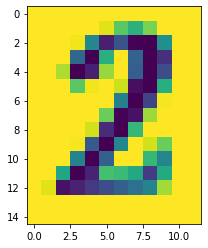

In [71]:
letter_image_file = 'extracted_letter_images/2/000001.png'

image = cv2.imread(letter_image_file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape) 
(h, w) = image.shape[:2] # note that cv.imread gets an array of h x w, h goes first
# add [:2] so that even if color image will work, not needed here though

plt.imshow(image)
plt.show()

Since `h > w`, we make sure `h` fits in our desired height value, e.g., 20:

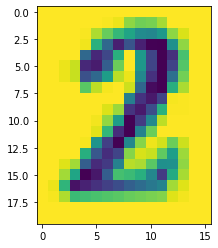

In [72]:
import imutils

image = imutils.resize(image, height=20)
# imutils.resize maintains the aspect ratio

plt.imshow(image)
plt.show()

Now we pad along width to make the image square, i.e., 20 x 20:

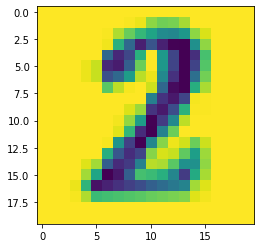

In [73]:
# determine the padding values for the width (= 20)
# to obtain the target dimensions
padW = int((20 - image.shape[1]) / 2.0) # may have rounding

# pad the image
image = cv2.copyMakeBorder(image, 0, 0, padW, padW,
        cv2.BORDER_REPLICATE)

# apply one more resizing to handle any rounding issues
image = cv2.resize(image, (20, 20))

plt.imshow(image)
plt.show()

Using what you learned, now write a function to resize images. Note that you also need to handle the possible case `h < w`:

In [113]:
def resize_to_fit(image, width, height):
    """
    A helper function to resize an image to fit within a given size
    - param image: image to resize
    - param width: desired width in pixels
    - param height: desired height in pixels
    - return: the resized image
    """

    #############################################################################
    # TODO: your code here ...                                                  #
    #############################################################################
    (w, h) = image.shape[:20]
   
    if h < w:
        image = imutils.resize(image, height=height)
    else:
        image = imutils.resize(image, width=width)
    
    padHeight = int((height - image.shape[0]) / 2.0)
    padWidth = int((width - image.shape[1]) / 2.0)
   
    image = cv2.copyMakeBorder(image, padHeight, padHeight, padWidth, padWidth,
        cv2.BORDER_REPLICATE)
    image = cv2.resize(image, (width, height))

    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################

    # return the pre-processed image
    return image

Prepare the training and validating datasets:

In [114]:
from imutils import paths

# initialize the data and labels
data_labels = []

progress_folder = ''

# loop over the input images
# imutils.paths.list_images will list all images in the 32 subfolders
for image_file in paths.list_images(LETTER_IMAGES_FOLDER):
    # Load the image and convert it to grayscale
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the letter so it fits in a 20x20 pixel box
    image = resize_to_fit(image, 20, 20)

    # Add a third channel dimension to the image to make Keras happy
    image = np.expand_dims(image, axis=2)

    # Grab the name of the letter based on the folder it was in
    label = image_file.split(os.path.sep)[-2]
    # extracted_letter_images/2/000001.png, after split
    # extracted_letter_images, 2, 000001.png
    # so 2 is the 2nd last, accessed using index -2
    
    if label != progress_folder:
        print('Processing Folder', label)
        progress_folder = label
    
    # Add the letter image and it's label to our training data
    data_labels.append((image,label))

Processing Folder M
Processing Folder U
Processing Folder R
Processing Folder E
Processing Folder L
Processing Folder 2
Processing Folder H
Processing Folder 6
Processing Folder N
Processing Folder D
Processing Folder X
Processing Folder Y
Processing Folder 4
Processing Folder Q
Processing Folder 3
Processing Folder F
Processing Folder K
Processing Folder J
Processing Folder C
Processing Folder A
Processing Folder 7
Processing Folder T
Processing Folder 9
Processing Folder 5
Processing Folder B
Processing Folder P
Processing Folder Z
Processing Folder W
Processing Folder G
Processing Folder S
Processing Folder 8
Processing Folder V


In [115]:
# shuffling training data, as we will use part of it for validation and we need labels to be balanced

import random

random.shuffle(data_labels)
data = [x[0] for x in data_labels]
labels = [x[1] for x in data_labels]

Convert lists into NumPy arrays as required by Keras for input + data normalization:

In [116]:
# scale the raw pixel intensities to the range [0, 1] (this is important!!!)
data = np.array(data, dtype="float") / 255.0

# you may also use std rather than 255, and center the data by mean as follows:
#data = (np.array(data, dtype="float") - data.mean()) / data.std()
# in this case you need to remember the mean and std for use during testing later

# scaling is not needed if you use BatchNormalization after Conv2D and before Activation

labels = np.array(labels)

Split into training and validation datasets:

In [117]:
from sklearn.preprocessing import LabelBinarizer

# Convert the labels (letters) into one-hot encodings that Keras can work with
lb = LabelBinarizer().fit(labels)
print(lb.classes_)
labels = lb.transform(labels)
print()
print(labels)

['2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'J' 'K'
 'L' 'M' 'N' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [118]:
import pickle

MODEL_LABELS_FILENAME = "model_labels.dat"

# Save the mapping from labels to one-hot encodings.
# We'll need this later when we use the model to decode what it's predictions mean
with open(MODEL_LABELS_FILENAME, "wb") as f:
    pickle.dump(lb, f)

Now we are ready to train it using Keras. We’ll use a simple convolutional neural network architecture with two convolutional layers and two fully-connected layers:

In [119]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

clear_session() # free existing Keras models

# Build the neural network!
model = Sequential()

# First convolutional layer with max pooling
model.add(Conv2D(20, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second convolutional layer with max pooling
model.add(Conv2D(50, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Hidden layer with 500 nodes
model.add(Flatten())
model.add(Dense(500, activation="relu"))

# Output layer with 32 nodes (one for each possible letter/number we predict)
model.add(Dense(32, activation="softmax"))

In [120]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 50)        9050      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 50)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1250)              0         
                                                                 
 dense (Dense)               (None, 500)               6

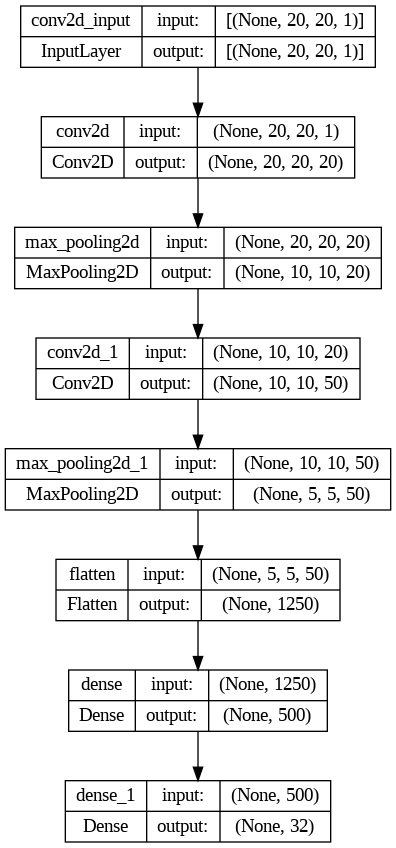

In [121]:
# from tensorflow.keras.utils import plot_model
from keras.utils import plot_model # if does not work properly, try the previous line instead

MODEL_PLOT_FILE = 'model_plot.png'
plot_model(model, to_file=MODEL_PLOT_FILE, show_shapes=True, show_layer_names=True)
display(Image(filename=MODEL_PLOT_FILE))

Questions: (1) Why `conv2d_1` has 9050 parameters? (2) Why `dense` has 625500 parameters?

Hint: self-study http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture5.pdf
    
**Type Your Answer Here:** because it operates as a convolutional kernel that relies on the underlying layers. The filter performs dense operations, utilizing the weights as the primary component in linear operations. This contributes to the non-linear activation function, resulting in dense having 625000 parameters.


Now, let us do the actual training:

In [122]:
# Ask Keras to build the TensorFlow model behind the scenes
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [123]:
# Train the neural network, 20% of the data is used for validation
model.fit(data, labels, validation_split=0.20, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
969/969 [==============================] - 35s 35ms/step - loss: 0.2113 - accuracy: 0.9502 - val_loss: 0.0314 - val_accuracy: 0.9937
Epoch 2/10
969/969 [==============================] - 32s 33ms/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0112 - val_accuracy: 0.9965
Epoch 3/10
969/969 [==============================] - 31s 32ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.0093 - val_accuracy: 0.9972
Epoch 4/10
969/969 [==============================] - 31s 32ms/step - loss: 0.0063 - accuracy: 0.9983 - val_loss: 0.0075 - val_accuracy: 0.9978
Epoch 5/10
969/969 [==============================] - 30s 31ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0082 - val_accuracy: 0.9985
Epoch 6/10
969/969 [==============================] - 32s 33ms/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.0096 - val_accuracy: 0.9977
Epoch 7/10
969/969 [==============================] - 33s 34ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0076 - val_accuracy:

Save the model for later use:

In [124]:
MODEL_FILENAME = "captcha_Letters.hdf5"

# Save the trained model to disk
model.save(MODEL_FILENAME)

In [131]:
#See what will happen if you do not scale your data by 255.0?
#HINT: simply train again with data/255.0 instead of 255, and see how the loss and acc look like;
#      you need to recreate your model by running the cell containing clear_session() before

#[YOUR CODE HERE]

    #############################################################################
    # TODO: your code here ...                                                  #
    #############################################################################

import cv2
import pickle
import os.path
import numpy as np
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense


LETTER_IMAGES_FOLDER = "extracted_images"
MODEL_FILENAME = "captcha_Letters.hdf5"
MODEL_LABELS_FILENAME = "model_Letters.dat"


data_Images = []
labels_Images = []


for image_file in paths.list_images(LETTER_IMAGES_FOLDER):

    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = resize_to_fit(image, 20, 20)

    image = np.expand_dims(image, axis=2)

    x = image_file.split(os.path.sep)[-2]

    data_Images.append(image)
    labels_Images.append(x)


data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.25, random_state=0)


lb = LabelBinarizer().fit(Y_train)
Y_train = lb.transform(Y_train)
Y_test = lb.transform(Y_test)


with open(MODEL_LABELS_FILENAME, "wb") as f:
    pickle.dump(lb, f)


model = Sequential()


model.add(Conv2D(50, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(20, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Flatten())
model.add(Dense(500, activation="relu"))


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.add(Dense(32, activation="softmax"))

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=10, verbose=1)


model.save(MODEL_FILENAME)

    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################

Epoch 1/10
909/909 [==============================] - 42s 43ms/step - loss: 3.4658 - accuracy: 0.0338 - val_loss: 3.4660 - val_accuracy: 0.0331
Epoch 2/10
909/909 [==============================] - 38s 42ms/step - loss: 3.4654 - accuracy: 0.0357 - val_loss: 3.4662 - val_accuracy: 0.0331
Epoch 3/10
909/909 [==============================] - 40s 44ms/step - loss: 3.4653 - accuracy: 0.0357 - val_loss: 3.4663 - val_accuracy: 0.0331
Epoch 4/10
909/909 [==============================] - 38s 42ms/step - loss: 3.4653 - accuracy: 0.0357 - val_loss: 3.4664 - val_accuracy: 0.0331
Epoch 5/10
909/909 [==============================] - 39s 43ms/step - loss: 3.4653 - accuracy: 0.0357 - val_loss: 3.4663 - val_accuracy: 0.0331
Epoch 6/10
909/909 [==============================] - 37s 41ms/step - loss: 3.4653 - accuracy: 0.0357 - val_loss: 3.4663 - val_accuracy: 0.0331
Epoch 7/10
909/909 [==============================] - 37s 41ms/step - loss: 3.4653 - accuracy: 0.0357 - val_loss: 3.4664 - val_accuracy:

## Step 3: Use the model to solve CAPTCHAs!

The rest part can be run independently once models are saved.

Get an image from the online demo: https://contactform7.com/captcha/ and try our model on it:

In [150]:
# replace the url with the link of the image you see
# [Using the same image will cause points deducted !!!]
#!wget https://contactform7.com/wp-content/uploads/wpcf7_captcha/4034640145.png
# use the name of the file you downloaded
TEST_FILE_NAME = 'skhan61.png'

# show the image
from IPython.display import Image

display(Image(filename=TEST_FILE_NAME))

Load saved model data:

In [151]:
from tensorflow.keras.models import load_model
import pickle

MODEL_FILENAME = "captcha_model.hdf5"
MODEL_LABELS_FILENAME = "model_labels.dat"

# Load up the model labels (so we can translate model predictions to actual letters)
with open(MODEL_LABELS_FILENAME, "rb") as f:
    lb = pickle.load(f)

# Load the trained neural network
model = load_model(MODEL_FILENAME)

Load packages and define functions for independent running of Part 3:

In [152]:
import numpy as np
import imutils
import cv2

# [!!! please also run the cell defining function "resize_to_fit" again, if you run Part 3 alone]

Get the letters from the downloaded images:

In [153]:
# Load the image and convert it to grayscale
image = cv2.imread(TEST_FILE_NAME)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Add some extra padding around the image
gray = cv2.copyMakeBorder(gray, 20, 20, 20, 20, cv2.BORDER_REPLICATE)

# threshold the image (convert it to pure black and white)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# find the contours (continuous blobs of pixels) the image
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
# !!! if the cell reports error, replace [0] above with [1]

letter_image_regions = []

# Now we can loop through each of the four contours and extract the letter
# inside of each one
for contour in contours:
    # Get the rectangle that contains the contour
    (x, y, w, h) = cv2.boundingRect(contour)
    letter_image_regions.append((x, y, w, h))

# If we found more or less than 4 letters in the captcha, our letter extraction
# didn't work correcly. Skip the image instead of saving bad training data!
if len(letter_image_regions) != 4:
    print('[WARNING]', TEST_FILE_NAME, 'has', len(letter_image_regions), 'contours, unable to process')
else:
    print('[SUCCESS]')

[SUCCESS]


If you see a warning, use another image instead and repeat the previous steps.

Otherwise, continue to create an output image:

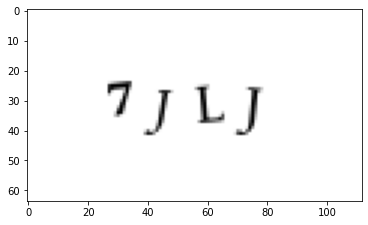

In [154]:
# Sort the detected letter images based on the x coordinate to make sure
# we are processing them from left-to-right so we match the right image
# with the right letter
letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])

# Create an output image and a list to hold our predicted letters
output = cv2.merge([gray] * 3) # 2D gray image -> 3D color image

# show the 3D image
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
from matplotlib import pyplot as plt

#Show the image with matplotlib
plt.imshow(output)
plt.show()

1/1 [==============================] - 0s 41ms/step
CAPTCHA text is: 7JLJ


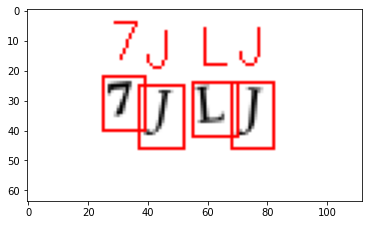

In [155]:
predictions = []

# Save out each letter as a single image
for letter_bounding_box in letter_image_regions:
    # Grab the coordinates of the letter in the image
    x, y, w, h = letter_bounding_box

    # Extract the letter from the original image with a 2-pixel margin around the edge
    letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]

    # Re-size the letter image to 20x20 pixels to match training data
    letter_image = resize_to_fit(letter_image, 20, 20)
    
    # Turn the single image into a 4D list of images to make Keras happy
    # 4D: image_number (=1) x height x width x channel (=1)
    letter_image = np.expand_dims(letter_image, axis=2)
    letter_image = np.expand_dims(letter_image, axis=0)
    
    # Ask the neural network to make a prediction
    prediction = model.predict(letter_image) # output is one-hot encoded
        
    letter = lb.inverse_transform(prediction)[0]
    # use [0] since there is only one test data's label item in the list
    predictions.append(letter)
    
    # draw the prediction on the output image
    # (255, 0, 0) = red
    cv2.rectangle(output, (x - 2, y - 2), (x + w + 4, y + h + 4), (255, 0, 0), 1)
    cv2.putText(output, letter, (x, y - 8), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (255, 0, 0), 1)

# see prediction result:

# Print the captcha's text
captcha_text = "".join(predictions)
print("CAPTCHA text is: {}".format(captcha_text))

# Show the annotated image
plt.imshow(output)
plt.show()

Questions: Is the prediction correct? How many letters are correctly predicted?
    
**Type Your Answer Here:** Yes our prediction is correct and our 4 letters are prideicted correctly. Thank God.